In [2]:
from keras import layers
from keras import models
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Using TensorFlow backend.


In [6]:
import os,shutil
original_dataset_dir=r'D:\Cdeepmachine\train'
base_dir=r'D:\Cdeepmachine\train\cats_and_dogs'
os.mkdir(base_dir)
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

train_cats_dir=os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir=os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir=os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir=os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir=os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir=os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [7]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dataset_dir,fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [8]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
validation_generator=test_datagen.flow_from_directory(
 validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
from sklearn.preprocessing import LabelEncoder
history=model.fit_generator(train_generator,
                           steps_per_epoch=100,
                           epochs=30,
                           validation_data=validation_generator,
                           validation_steps=50)

Epoch 1/30
100/100 [==============================] - 11s 111ms/step - loss: 0.6879 - acc: 0.5560 - val_loss: 0.6739 - val_acc: 0.5440
Epoch 2/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6580 - acc: 0.6195 - val_loss: 0.6477 - val_acc: 0.6460
Epoch 3/30
100/100 [==============================] - 7s 67ms/step - loss: 0.6059 - acc: 0.6730 - val_loss: 0.6929 - val_acc: 0.5750
Epoch 4/30
100/100 [==============================] - 7s 74ms/step - loss: 0.5572 - acc: 0.7145 - val_loss: 0.6057 - val_acc: 0.6760
Epoch 5/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5161 - acc: 0.7515 - val_loss: 0.5816 - val_acc: 0.6960
Epoch 6/30
100/100 [==============================] - 7s 66ms/step - loss: 0.4921 - acc: 0.7580 - val_loss: 0.6504 - val_acc: 0.6500
Epoch 7/30
100/100 [==============================] - 7s 68ms/step - loss: 0.4659 - acc: 0.7795 - val_loss: 0.5568 - val_acc: 0.7110
Epoch 8/30
100/100 [==============================] - 8s 76ms/step 

In [12]:
model.save('cats_and_dogs_small_1.h5')

In [20]:
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [16]:
datagen=ImageDataGenerator(rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                          horizontal_flip=True, fill_mode='nearest')

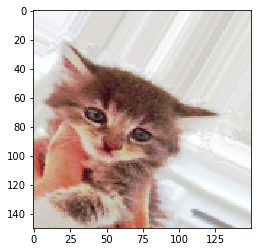

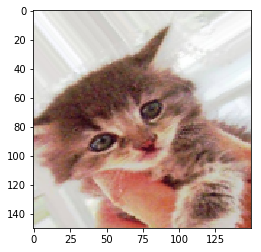

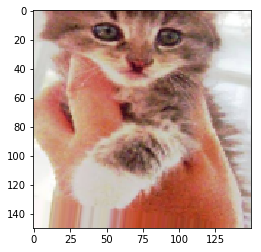

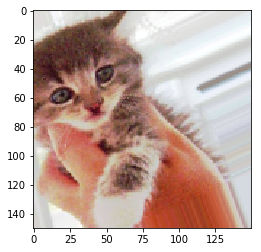

In [23]:

from keras.preprocessing import image
%matplotlib inline
fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path=fnames[3]
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4==0:
        break
plt.show()

In [24]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [25]:
train_datagen=ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,
                          horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(train_dir,
                                                 target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')
validation_generator=test_datagen.flow_from_directory(validation_dir,
                                                     target_size=(150,150),
                                                     batch_size=32,
                                                     class_mode='binary')
history=model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,
                           validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 19s 186ms/step - loss: 0.6914 - acc: 0.5197 - val_loss: 0.6887 - val_acc: 0.4994
Epoch 2/100
100/100 [==============================] - 17s 171ms/step - loss: 0.6758 - acc: 0.5700 - val_loss: 0.6509 - val_acc: 0.6147
Epoch 3/100
100/100 [==============================] - 17s 173ms/step - loss: 0.6557 - acc: 0.5987 - val_loss: 0.6944 - val_acc: 0.5451
Epoch 4/100
100/100 [==============================] - 17s 172ms/step - loss: 0.6313 - acc: 0.6350 - val_loss: 0.6258 - val_acc: 0.6450
Epoch 5/100
100/100 [==============================] - 17s 175ms/step - loss: 0.6227 - acc: 0.6434 - val_loss: 0.6280 - val_acc: 0.6142
Epoch 6/100
100/100 [==============================] - 18s 175ms/step - loss: 0.6069 - acc: 0.6659 - val_loss: 0.5880 - val_acc: 0.6849
Epoch 7/100
100/100 [==============================] - 18s 175ms/step - loss: 0.6029 - acc: 0.6619 -

100/100 [==============================] - 19s 191ms/step - loss: 0.4142 - acc: 0.8069 - val_loss: 0.4499 - val_acc: 0.7938
Epoch 61/100
100/100 [==============================] - 19s 191ms/step - loss: 0.4160 - acc: 0.8078 - val_loss: 0.4556 - val_acc: 0.7758
Epoch 62/100
100/100 [==============================] - 19s 190ms/step - loss: 0.4053 - acc: 0.8062 - val_loss: 0.4621 - val_acc: 0.8008
Epoch 63/100
100/100 [==============================] - 19s 189ms/step - loss: 0.4062 - acc: 0.8088 - val_loss: 0.4822 - val_acc: 0.7841
Epoch 64/100
100/100 [==============================] - 19s 191ms/step - loss: 0.4018 - acc: 0.8131 - val_loss: 0.4666 - val_acc: 0.8009
Epoch 65/100
100/100 [==============================] - 19s 191ms/step - loss: 0.4008 - acc: 0.8141 - val_loss: 0.5481 - val_acc: 0.7678
Epoch 66/100
100/100 [==============================] - 19s 190ms/step - loss: 0.3992 - acc: 0.8144 - val_loss: 0.4518 - val_acc: 0.7867
Epoch 67/100
100/100 [==============================] 

In [26]:
model.save('cats_and_dogs_small_2.h5')

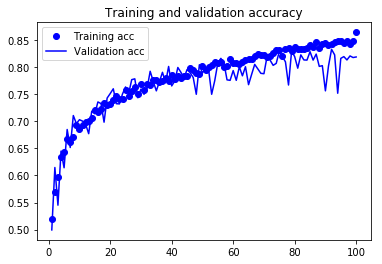

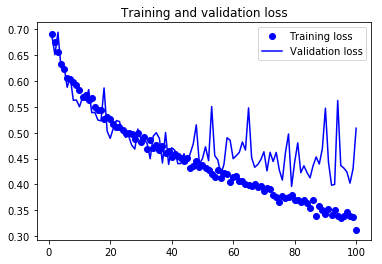

In [27]:
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()